## 📈 Analisis dan Perhitungan Algoritma Bresenham
Menghitung garis dari (3, 2) ke (10, 5)

In [1]:
import pandas as pd

def hitung_bresenham_steps(x1, y1, x2, y2):
    # Daftar untuk menyimpan langkah perhitungan
    calculation_steps = []
    # Daftar untuk menyimpan koordinat hasil
    koordinat_pixel = []

    dx = x2 - x1
    dy = y2 - y1
    
    # Parameter awal dan konstanta
    p = 2 * dy - dx
    dua_dy = 2 * dy
    dua_dy_dx = 2 * (dy - dx)

    x = x1
    y = y1
    k = 0
    
    # Simpan langkah awal (k=0)
    calculation_steps.append({
        'k': k,
        'Plot (x, y)': (x, y),
        'p_k': p,
        'Keterangan': 'Awal'
    })
    koordinat_pixel.append((x, y))

    # Iterasi untuk menemukan piksel berikutnya
    while x < x2:
        k += 1
        p_sebelum = p
        
        if p < 0:
            p = p + dua_dy
            x = x + 1
            # y tetap
            keterangan = 'p < 0. y tetap'
        else:
            p = p + dua_dy_dx
            x = x + 1
            y = y + 1
            keterangan = 'p >= 0. y naik'
        
        # Simpan langkah perhitungan
        calculation_steps.append({
            'k': k,
            'Plot (x, y)': (x, y),
            'p_k': p, # ini adalah p_k+1
            'Keterangan': keterangan
        })
        koordinat_pixel.append((x, y))
        
    return calculation_steps, koordinat_pixel

# Eksekusi fungsi perhitungan
langkah_langkah, koordinat_hasil = hitung_bresenham_steps(3, 2, 10, 5)

# Konversi hasil perhitungan ke DataFrame Pandas
df = pd.DataFrame(langkah_langkah)

# Cetak tabel hasil perhitungan
print("### 📊 Tabel Perhitungan Bresenham")
print(df.to_markdown(index=False))


### 📊 Tabel Perhitungan Bresenham
|   k | Plot (x, y)   |   p_k | Keterangan     |
|----:|:--------------|------:|:---------------|
|   0 | (3, 2)        |    -1 | Awal           |
|   1 | (4, 2)        |     5 | p < 0. y tetap |
|   2 | (5, 3)        |    -3 | p >= 0. y naik |
|   3 | (6, 3)        |     3 | p < 0. y tetap |
|   4 | (7, 4)        |    -5 | p >= 0. y naik |
|   5 | (8, 4)        |     1 | p < 0. y tetap |
|   6 | (9, 5)        |    -7 | p >= 0. y naik |
|   7 | (10, 5)       |    -1 | p < 0. y tetap |


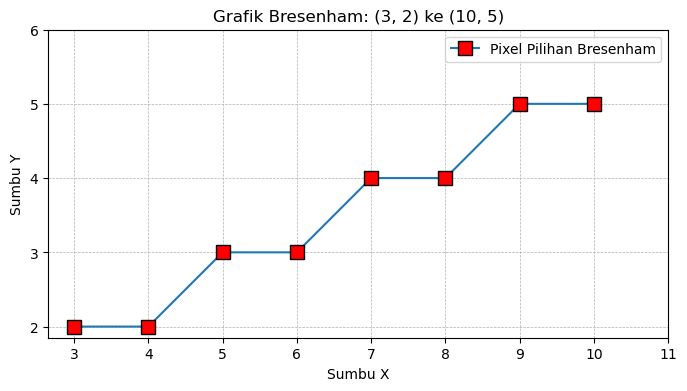

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 'koordinat_hasil' diambil dari variabel global 
# yang dihasilkan oleh sel sebelumnya
x_vals = [p[0] for p in koordinat_hasil]
y_vals = [p[1] for p in koordinat_hasil]

# Konfigurasi Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, 's-', markersize=10, markerfacecolor='red', markeredgecolor='black', label='Pixel Pilihan Bresenham')

plt.title('Grafik Bresenham: (3, 2) ke (10, 5)')
plt.xlabel('Sumbu X')
plt.ylabel('Sumbu Y')

# Mengatur grid agar sesuai dengan piksel
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(min(x_vals), max(x_vals) + 2))
plt.yticks(np.arange(min(y_vals), max(y_vals) + 2))
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()
